# 지도시각화

## John Snow cholera map
* 1854년 런던의 콜레라 전염병 지도 시각화 사례
* 상수도 펌프와 콜레라 확산 간의 관련성을 밝혀냄

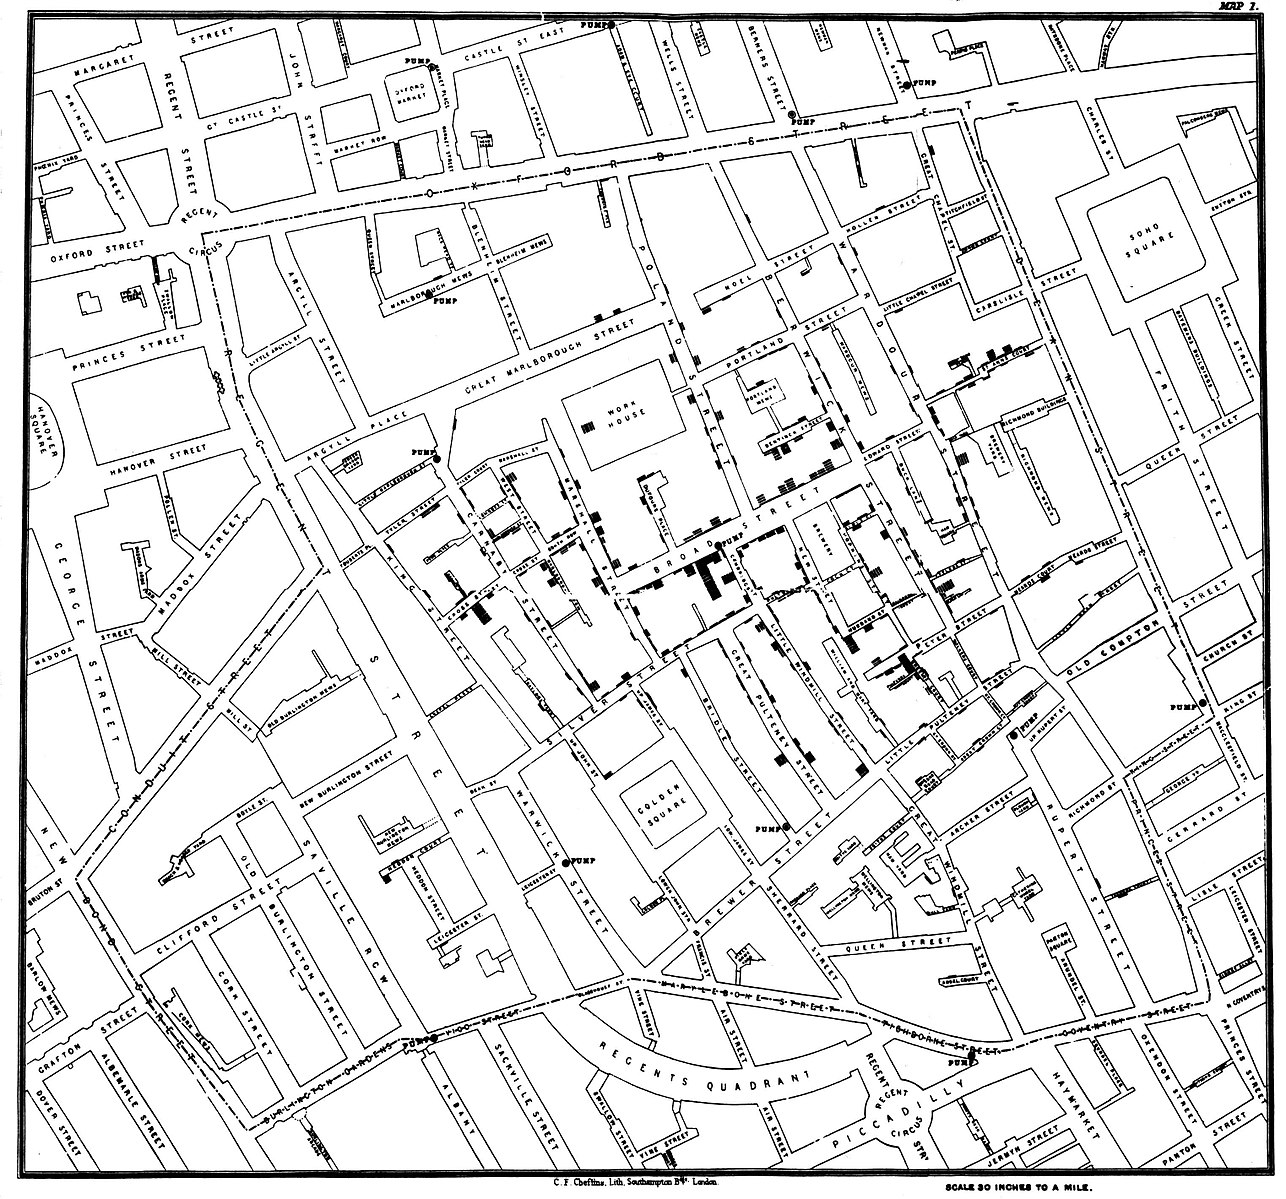

## Facebook 사용자 연결지도
* Made by Paul Butler

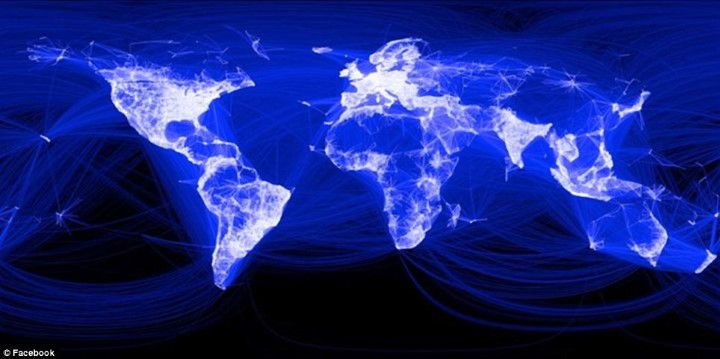

## GeoPandas를 이용해 데이터 시각화 하기

In [27]:
# 라이브러리 추가하기
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [28]:
# 서울시 시군구 지도 데이터 불러오기
_seoul_sgg = './maps/final/seoul_sgg_stat.geojson'
seoul_sgg_stat = gpd.read_file(_seoul_sgg)
seoul_sgg_stat.info()
seoul_sgg_stat.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
SGG_CODE      25 non-null object
SGG_NM        25 non-null object
SEDAE         25 non-null int64
SEDAE_INGU    25 non-null float64
TOTAL_POP     25 non-null int64
MALE_POP      25 non-null int64
FEMALE_POP    25 non-null int64
65_OVER       25 non-null int64
COUNT         25 non-null int64
geometry      25 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 2.0+ KB


,SGG_CODE,SGG_NM,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,COUNT,geometry
0,11680,강남구,231612,54.29,561052,268941,292111,65060,75,"POLYGON ((127.1110354206454 37.48293504402488,..."
1,11740,강동구,177407,45.24,440359,218699,221660,56161,13,"POLYGON ((127.1458000886755 37.52198996684139,..."
2,11305,강북구,142533,29.67,328002,160252,167750,56530,5,"POLYGON ((127.0220295465139 37.6122870292313, ..."
3,11500,강서구,254257,47.24,608255,296175,312080,76032,14,"POLYGON ((126.8831662843492 37.55446522843518,..."
4,11620,관악구,255352,42.12,520929,262006,258923,70046,10,"POLYGON ((126.9704905925551 37.4753683309936, ..."


## plot을 이용해 단계구분도 만들기

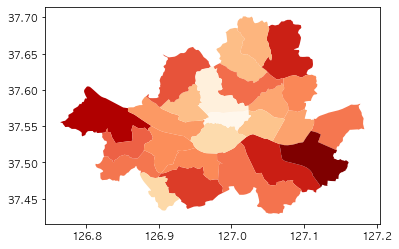

In [29]:
# 서울시 시군구 지도 데이터로 단계구분도(Chropleth Map) 시각화하기
fig, ax = plt.subplots(1, 1)
# divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
seoul_sgg_stat.plot(column='TOTAL_POP', ax=ax, legend=True, cax=cax, cmap='OrRd')

## 행정경계지도위에 스타벅스 매장 위치 그리기

In [30]:
# 서울시 스타벅스 매장 데이터 불러오기
_seoul_sb = './maps/final/seoul_starbucks.geojson'
seoul_sb_gdf = gpd.read_file(_seoul_sb)
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
STORE_NAME    495 non-null object
STORE_TYPE    495 non-null object
SIG_CD        495 non-null object
SIG_KOR_NM    495 non-null object
geometry      495 non-null object
dtypes: object(5)
memory usage: 19.4+ KB


,STORE_NAME,STORE_TYPE,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,11680,강남구,POINT (127.043069 37.501087)
1,논현역사거리,general,11680,강남구,POINT (127.022223 37.510178)
2,대치대원빌딩R,reserve,11680,강남구,POINT (127.062583 37.494668)
3,삼성역섬유센터R,reserve,11680,강남구,POINT (127.060651 37.50775)
4,압구정R,reserve,11680,강남구,POINT (127.033061 37.5273669)


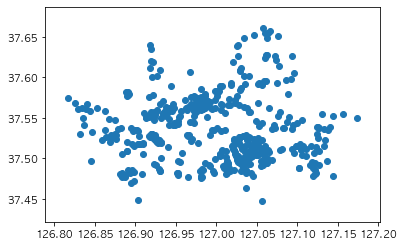

In [31]:
# plot으로 스타벅스 매장 포인트 그리기
seoul_sb_gdf.plot()

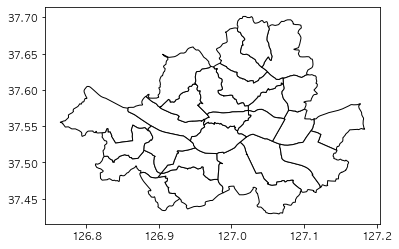

In [32]:
# 서울시 시군구 경계 그리기
base_map = seoul_sgg_stat.plot(color='white', edgecolor='black')

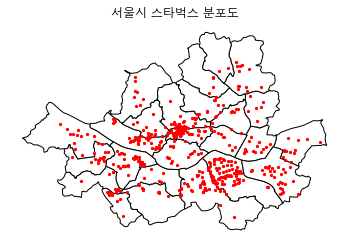

In [33]:
# import platform
# from matplotlib import font_manager, rc
# if platform.system() == 'Windows':
#     font_path = "c:/Windows/Fonts/malgun.ttf"
#     font = font_manager.FontProperties(fname=font_path).get_name()
#     rc('font', family=font)
# # Mac OS
# elif platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')

base_map = seoul_sgg_stat.plot(color='white', edgecolor="k")
ax = seoul_sb_gdf.plot(ax=base_map, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("서울시 스타벅스 분포도")
plt.show()